In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To read directly the CSV from the John Hopkins github repo
import io
import requests

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3, rc={'lines.linewidth': 3})

In [2]:
# Obtain the data from the John Hopkins github repo
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
s = requests.get(url).content

# df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 160 entries, UID to 6/18/20
dtypes: float64(3), int64(151), object(6)
memory usage: 4.0+ MB


In [4]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,180,180,183,183,183,183,185,186,188,192
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,30,30,30,30,30,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,5185,5329,5352,5536,5690,5811,5890,5951,6003,6111
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,71,72,72,72,72,72,72,72,73,73


## Exploratory Data Analysis for Los Angeles

In [24]:
'Raleigh' in set(df['Admin2'])
df[df['Admin2']=='Wake']
# df[df['Province_State']=='North Carolina'].tail(n=20)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
1986,84037183,US,USA,840,37183.0,Wake,North Carolina,US,35.788793,-78.652492,...,2378,2541,2601,2769,2892,3011,3099,3163,3249,3385


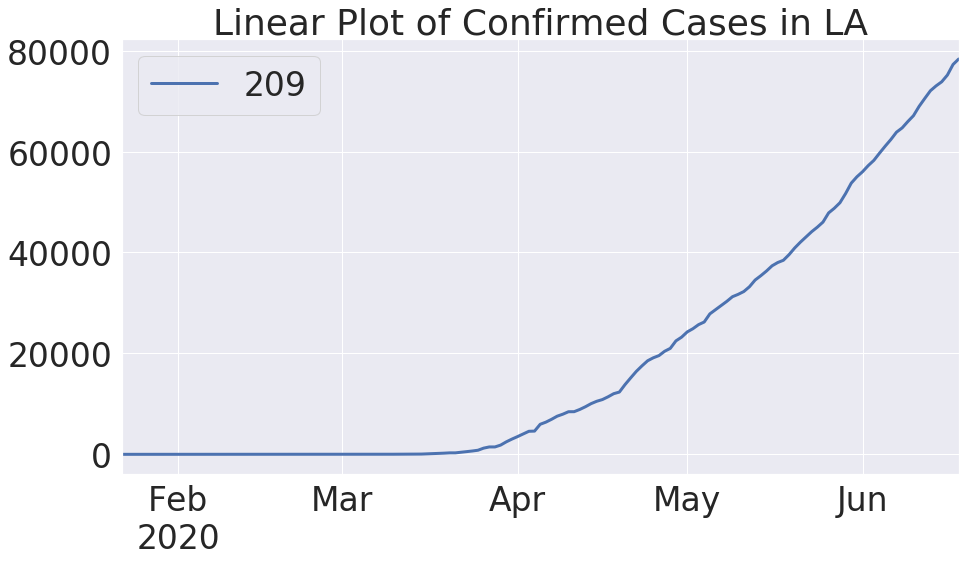

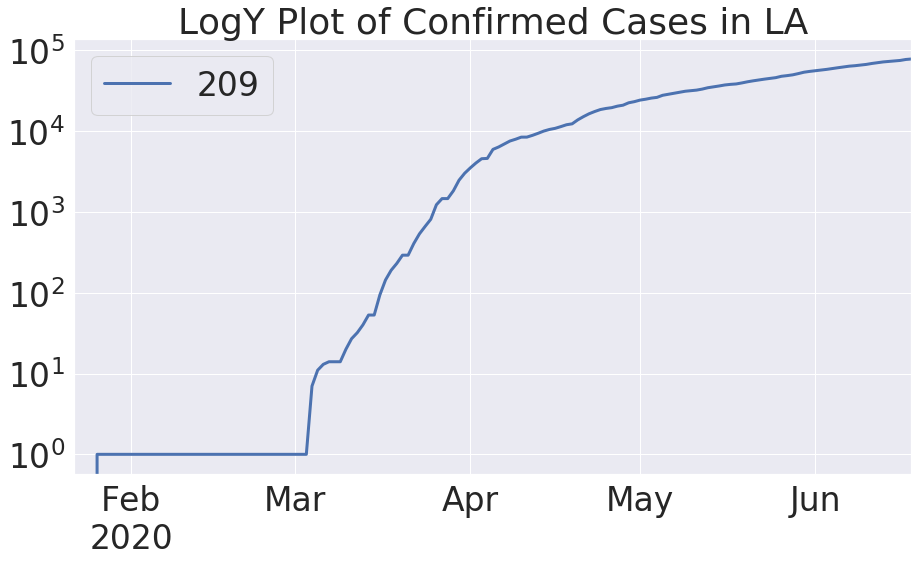

In [27]:
# df_LA = df[df['Admin2']=='Wake']
df_LA = df[df['Admin2']=='Los Angeles']
df_LA = df_LA.transpose()
df_LA = df_LA.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df_LA.index = pd.to_datetime(df_LA.index)
df_LA.head()

fig1 = df_LA.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases in LA', kind='line')

fig2 = df_LA.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases in LA')

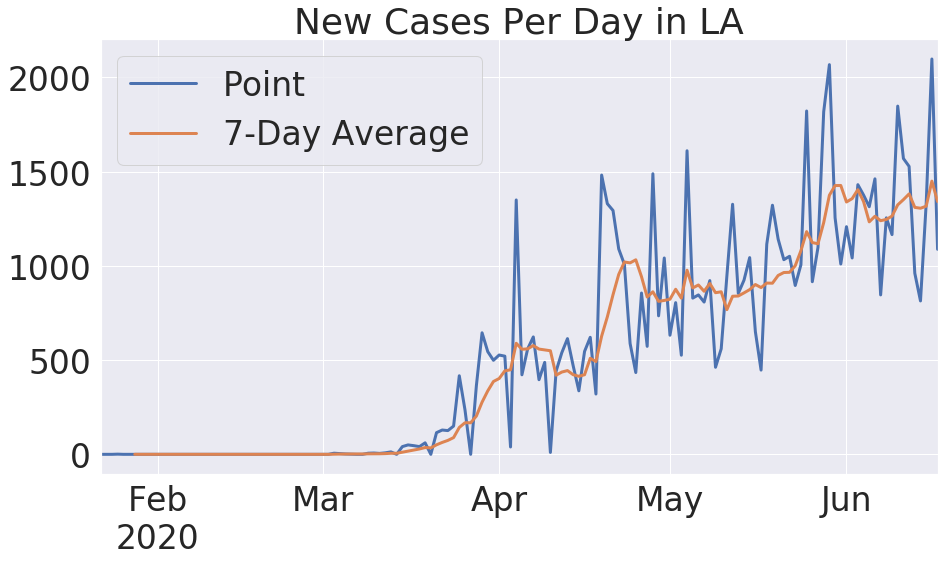

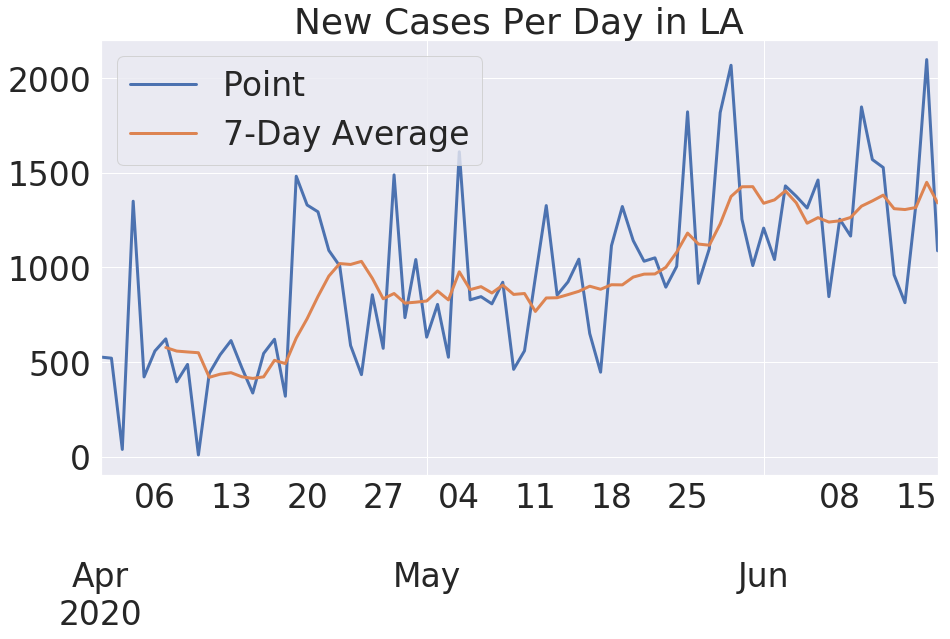

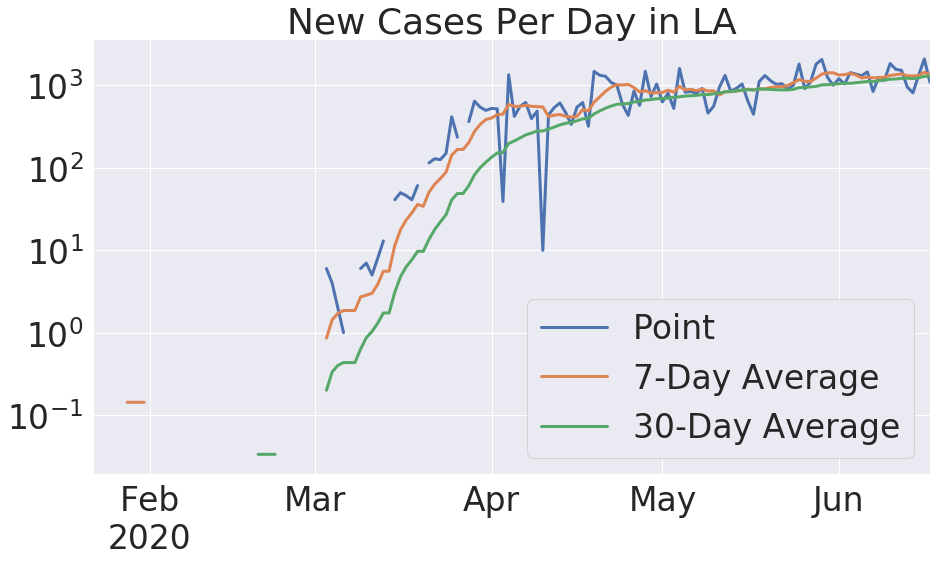

In [28]:
df_newcases_LA = df_LA[1:].values-df_LA[0:-1]
fig3 = df_newcases_LA.rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig3 = df_newcases_LA.rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig3)

fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig5)


# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_LA[ df_newcases_LA.values == 0 ].index
df_newcases_LA_tmp1 = df_newcases_LA.copy()
df_newcases_LA_tmp1.loc[indexVal] = np.NaN

df_newcases_LA_tmp2 = df_newcases_LA.rolling(window=7).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp2.values == 0 ].index
df_newcases_LA_tmp2.loc[indexVal] = np.NaN

df_newcases_LA_tmp3 = df_newcases_LA.rolling(window=30).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp3.values == 0 ].index
df_newcases_LA_tmp3.loc[indexVal] = np.NaN

fig4 = df_newcases_LA_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig4 = df_newcases_LA_tmp2.rename(columns={209: '7-Day Average'}).plot(logy=True, ax=fig4)
fig4 = df_newcases_LA_tmp3.rename(columns={209: '30-Day Average'}).plot(logy=True, ax=fig4)

## Exploratory Data Analysis by State

In [10]:
df_state = df.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).groupby(['Province_State']).sum()
df_state = df_state.transpose()
df_state.index = pd.to_datetime(df_state.index)
df_state.tail()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-06-14,25615,660,0,35706,12501,152300,29115,45088,10264,49,...,30343,88523,14313,1127,72,54506,25834,2290,22758,1060
2020-06-15,26272,663,0,36844,12917,155726,29284,45235,10340,49,...,31004,90211,14608,1128,72,54886,26158,2322,22932,1079
2020-06-16,26912,675,0,39185,13191,158961,29427,45349,10403,49,...,31751,93569,14937,1131,72,55331,26531,2341,23198,1089
2020-06-17,27312,695,0,40937,13606,162798,29656,45429,10444,49,...,32114,97699,15344,1130,73,55775,26784,2376,23456,1114
2020-06-18,28206,707,0,43445,13928,167086,29886,45440,10499,49,...,32770,101259,15839,1135,73,56238,27192,2418,23876,1144


In [6]:
col_drop = df_state.columns[df_state.values[-1][:] < 50_000]
df_state = df_state.drop(columns=col_drop, axis=1)

df_state.tail()

Province_State,California,Florida,Georgia,Illinois,Maryland,Massachusetts,Michigan,New Jersey,New York,Pennsylvania,Texas,Virginia
2020-06-11,143377,69069,54973,130603,60197,104667,65449,165816,380892,81848,82658,52647
2020-06-12,146659,70971,55783,131198,60613,105059,65672,166164,381714,82481,84927,53211
2020-06-13,150018,73552,56804,131871,61305,105395,65836,166605,382630,82944,86915,53869
2020-06-14,152300,75568,57681,132543,61701,105603,66054,166881,383324,83203,88523,54506
2020-06-15,155726,77326,58414,133016,62032,105690,66085,167103,383944,83589,90211,54886


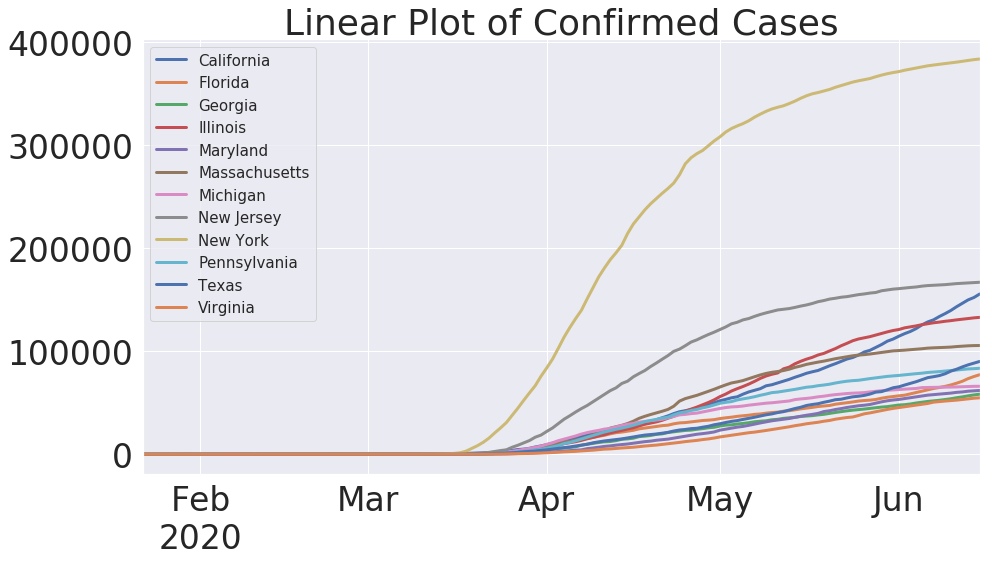

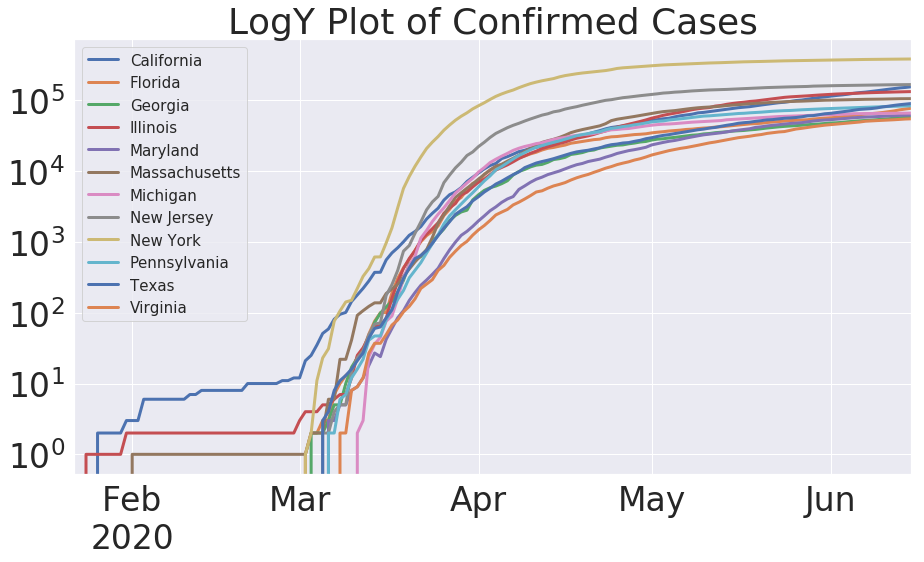

In [7]:
fig1 = df_state.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases', kind='line')
plt.legend(fontsize=15);
fig2 = df_state.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases')
plt.legend(fontsize=15);

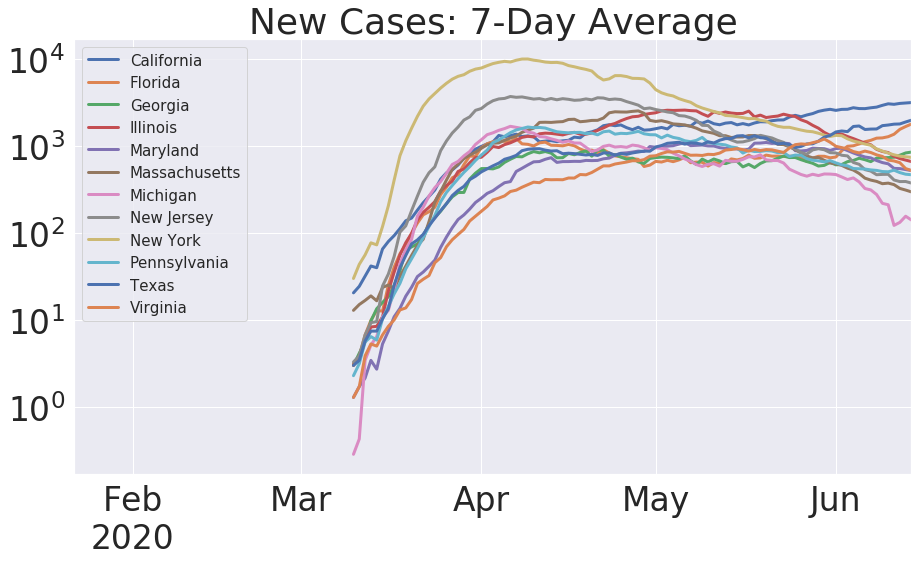

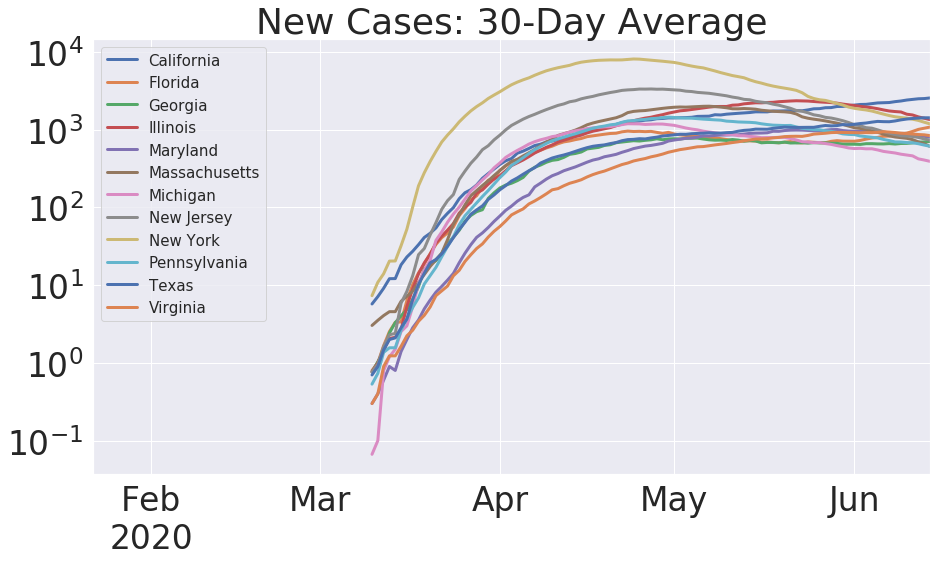

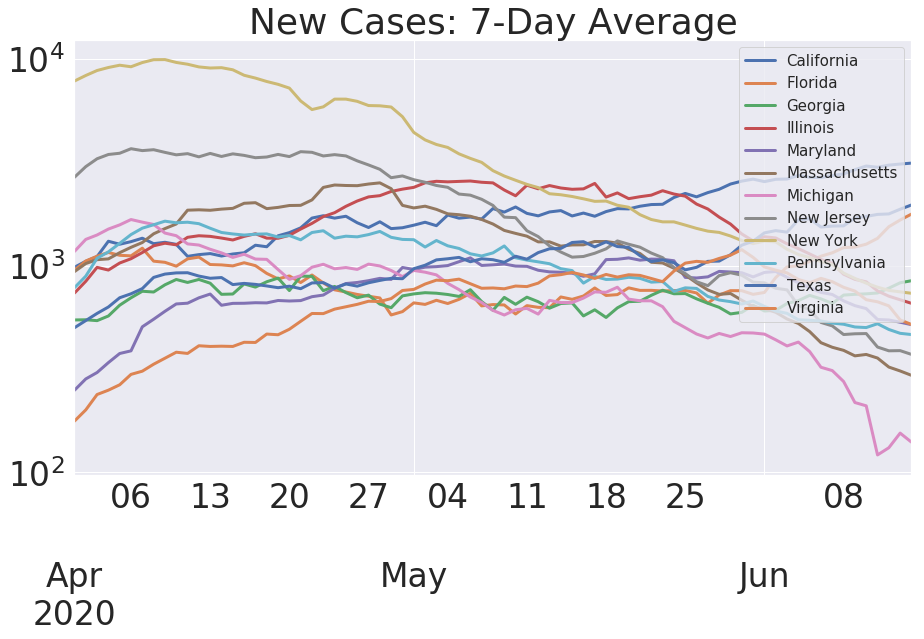

In [8]:
df_newcases_state = df_state[1:].values-df_state[0:-1]

# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_state[ df_newcases_state.values == 0 ].index
df_newcases_state_tmp1 = df_newcases_state.copy()
df_newcases_state_tmp1.loc[indexVal] = np.NaN

df_newcases_state_tmp2 = df_newcases_state.rolling(window=7).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp2.values == 0 ].index
df_newcases_state_tmp2.loc[indexVal] = np.NaN

df_newcases_state_tmp3 = df_newcases_state.rolling(window=30).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp3.values == 0 ].index
df_newcases_state_tmp3.loc[indexVal] = np.NaN

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2.plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);
fig5 = df_newcases_state_tmp3.plot(logy=True, figsize=(15,8), title='New Cases: 30-Day Average')
plt.legend(fontsize=15);

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2[df_newcases_state_tmp2.index>pd.to_datetime('03-31-20')].plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);